
## Introduction

In this notebook, I will use a CNN Model to create a Fashion Embedding. This information can be used in ML algorithms with higher semantic quality and similarity between Objects. We will use embeddings to identify similar items, this information will be used to recommend similar content in RecSys.

* **Introduction**
    * What is Embedding ?
    * How to use Embedding ?
* **Data Preparation**
* **Use Pre-Trained Model to Recommendation**
* Visualization Latent Space of Contents

#### Configure VM

In [ ]:
#!pip install swifter
#!pip install tensorflow==2.0.0

## What is Embedding ?

An embedding is a relatively low-dimensional space into which you can translate high-dimensional vectors. Embeddings make it easier to do machine learning on large inputs like sparse vectors representing words. Ideally, an embedding captures some of the semantics of the input by placing semantically similar inputs close together in the embedding space. An embedding can be learned and reused across models.

So a natural language modelling technique like Word Embedding is used to map words or phrases from a vocabulary to a corresponding vector of real numbers. As well as being amenable to processing by learning algorithms, this vector representation has two important and advantageous properties:

* **Dimensionality Reduction** — it is a more efficient representation
* **Contextual Similarity** — it is a more expressive representation

## Data Preparation
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

In [2]:
DATASET_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles']


In [11]:
#df=pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset/',engine='python')

In [5]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
4995,44573,Men,Footwear,Sandal,Sandals,Brown,Summer,2012,Casual,Coolers Men Brown Sandals
4996,37081,Women,Accessories,Bags,Handbags,Brown,Summer,2012,Casual,Lino Perros Women Brown Handbag
4997,57958,Women,Apparel,Saree,Sarees,Green,Summer,2012,Ethnic,Prafful Green Printed Sari
4998,5654,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Reebok Men's Winning Stride White Shoe


In [12]:
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
4995,44573,Men,Footwear,Sandal,Sandals,Brown,Summer,2012,Casual,Coolers Men Brown Sandals,44573.jpg
4996,37081,Women,Accessories,Bags,Handbags,Brown,Summer,2012,Casual,Lino Perros Women Brown Handbag,37081.jpg
4997,57958,Women,Apparel,Saree,Sarees,Green,Summer,2012,Ethnic,Prafful Green Printed Sari,57958.jpg
4998,5654,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Reebok Men's Winning Stride White Shoe,5654.jpg


In [13]:
df = df.reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [14]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

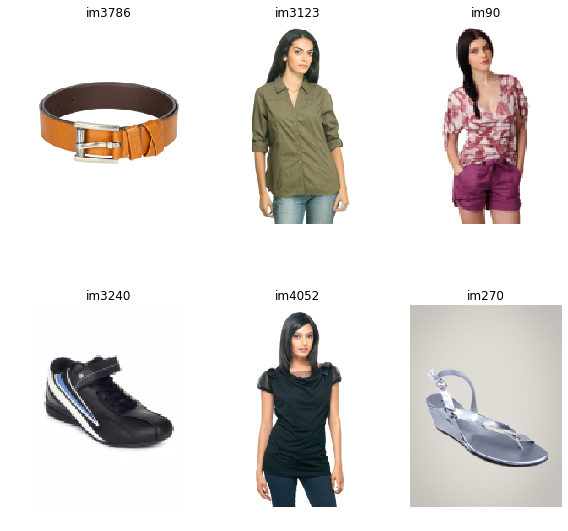

In [15]:
import matplotlib.pyplot as plt
import numpy as np


# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

The Dataset is made up of different items that can be found in a marketplace. The idea is to use embeddings to search for similarity and find similar items just using the image.

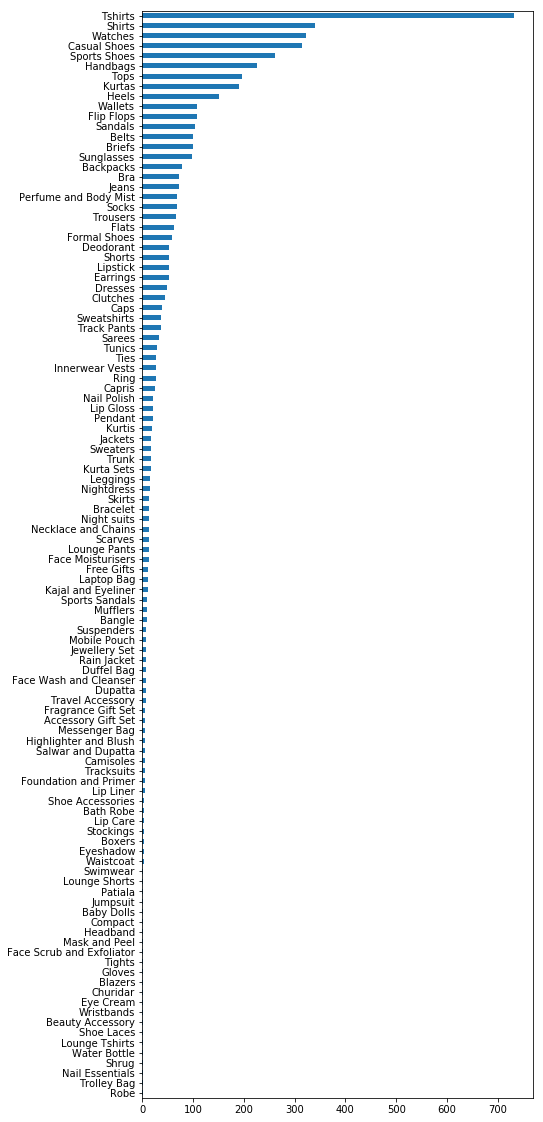

In [16]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

## Use Pre-Trained Model to Recommendation

In [17]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

Using TensorFlow backend.


'1.14.0'

In [18]:
# Input Shape
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D() #This pooling layer reduces the dimensions of the output from the convolutional base to a single vector by taking the maximum value in each feature map, creating a compact representation.
])

model.summary()

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0) # in keras we expand dimension
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

Get item Embedding

In [20]:
emb = get_embedding(model, df.iloc[0].image)
emb.shape

(2048,)

(240, 180, 3)
[ 4.952948   2.4448757  0.        ...  1.0319545  0.        10.621734 ]


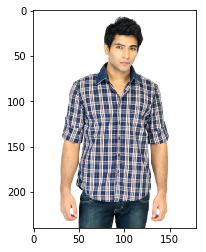

In [21]:
img_array = load_image(df.iloc[0].image)#Accesses the 'image' column of the first row of the DataFrame.
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) #cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB): Converts the image from BGR color space (used by OpenCV) to RGB color space (used by matplotlib).
print(img_array.shape)
print(emb)


In [22]:
df.shape

(5000, 11)

Get Embedding for all itens in dataset

In [24]:
%%time #%%time is a magic command used in Jupyter notebooks to measure the wall time taken to execute the cell.It helps in benchmarking and optimizing the code.

#import swifter #swifter is a library that provides a way to parallelize the apply method in pandas to speed up the execution.

# Parallel apply
df_sample      = df#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()


UsageError: Can't use statement directly after '%%time'!


In [ ]:
df_embs.head()

#### Compute Similarity Between Items

![](http://dataaspirant.com/wp-content/uploads/2015/04/cosine.png)

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4] #Selects and displays a 4x4 submatrix from the top-left corner of the cosine similarity matrix.
#This is useful for quickly inspecting the computed similarities between the first four embeddings.


array([[1.        , 0.70037174, 0.43672526, 0.66598403],
       [0.70037174, 1.        , 0.39877993, 0.8263402 ],
       [0.43672526, 0.39877993, 0.9999997 , 0.43273175],
       [0.66598403, 0.8263402 , 0.43273175, 1.        ]], dtype=float32)

#### Recommender Similar Items

In [26]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.9202467, 0.9184339, 0.9154813, 0.9109709, 0.91060525])

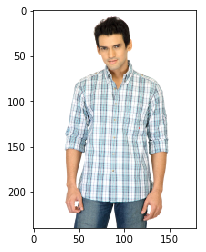

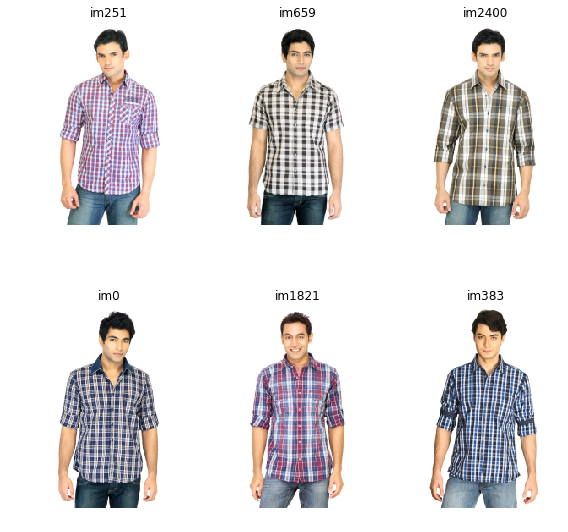

In [27]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

**Search for items similar to the reference to recommend. Apparently it's working!**

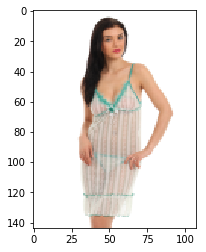

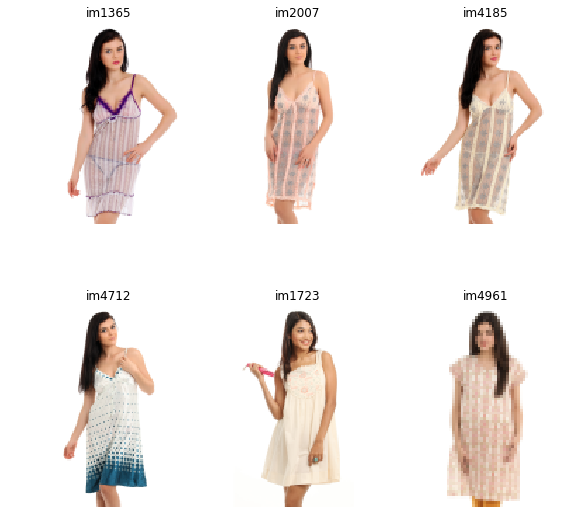

In [28]:
idx_ref = 878

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

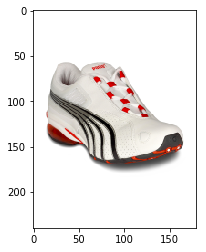

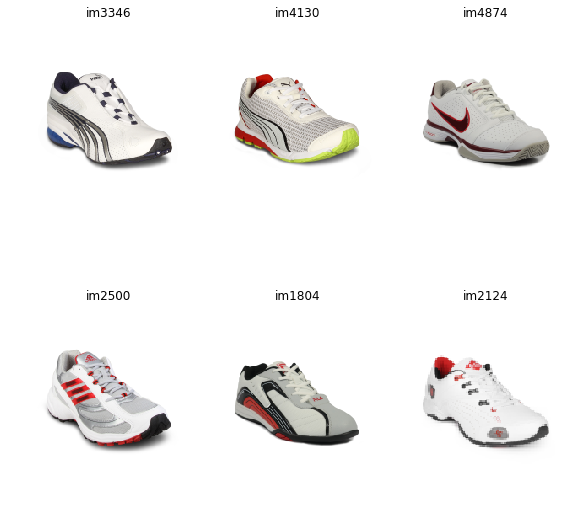

In [29]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

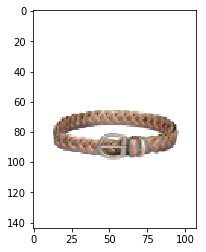

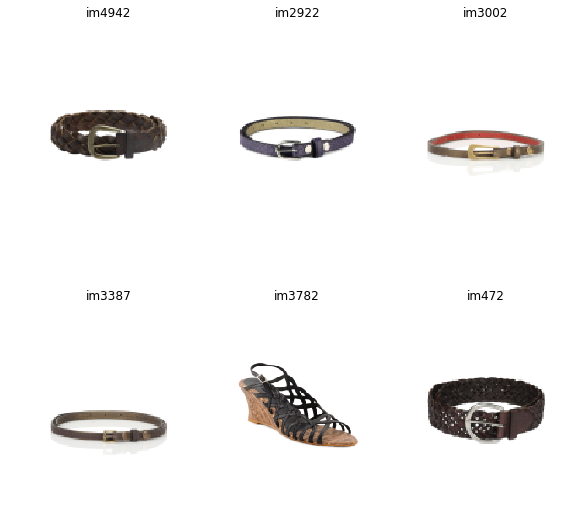

In [30]:
idx_ref = 3524

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

## Visualization Latent Space of Contents

Since our latent space is not two-dimensional, we will use TSNE to reduce dimensionality, so we can use some interesting visualizations that can be made at this point. One is to look at the neighborhoods of different classes in the latent 2D plane:

In [31]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [32]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [33]:
#t-SNE (t-distributed Stochastic Neighbor Embedding) dimensionality reduction on the embeddings of the movies to project them into a 2-dimensional space.
time_start = time.time() #Records the current time to calculate the time taken for t-SNE later.
#verbose=0: Disables verbosity. You can set it to 1 or 2 to get more information about the process.
#perplexity=40: A hyperparameter that affects the balance between local and global aspects of the data. Typically, it is set between 5 and 50.
#n_iter=300: The number of iterations for optimization. Higher values can lead to better results but take more time.
#time.time() - time_start: Calculates the total time taken for the t-SNE computation.
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_embs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 138.89364099502563 seconds


In [34]:
df['tsne-2d-one'] = tsne_results[:,0] #tsne_results[:,0]: This extracts the first column of the tsne_results, which corresponds to the first dimension of the 2D t-SNE embedding
df['tsne-2d-two'] = tsne_results[:,1]


In [41]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,tsne-2d-one,tsne-2d-two
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,4.198366,6.117643
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg,2.782470,1.625100
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg,-11.587955,0.257206
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,2.931219,1.050674
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg,1.759224,8.808966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44573,Men,Footwear,Sandal,Sandals,Brown,Summer,2012,Casual,Coolers Men Brown Sandals,44573.jpg,1.567421,-7.398607
4996,37081,Women,Accessories,Bags,Handbags,Brown,Summer,2012,Casual,Lino Perros Women Brown Handbag,37081.jpg,-7.954334,-7.830716
4997,57958,Women,Apparel,Saree,Sarees,Green,Summer,2012,Ethnic,Prafful Green Printed Sari,57958.jpg,12.070332,-3.223902
4998,5654,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Reebok Men's Winning Stride White Shoe,5654.jpg,8.601572,-9.081663


In [50]:
df['masterCategory'].unique()


array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items'], dtype=object)

In [40]:
df['tsne-2d-one'][0]


4.1983657

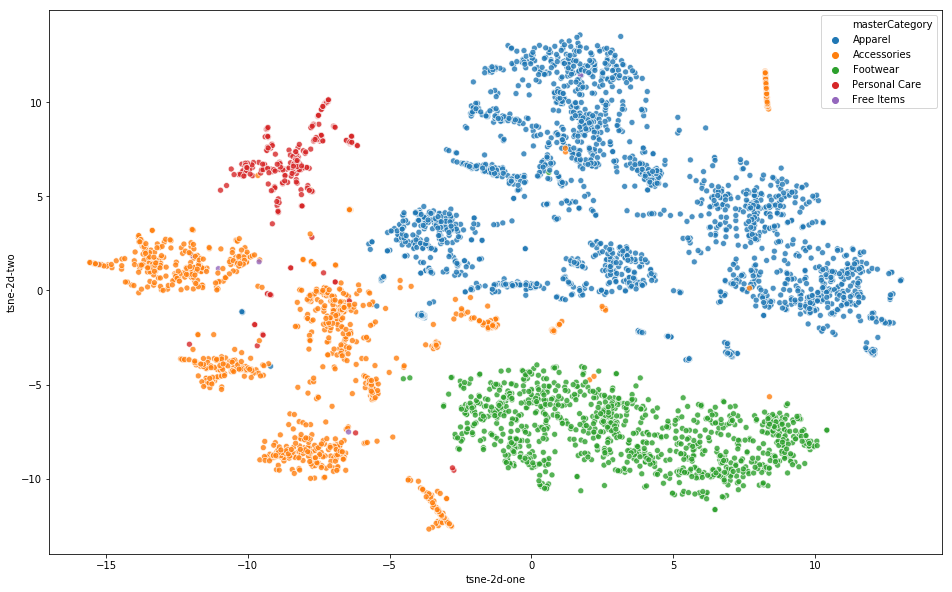

In [35]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="masterCategory",
                data=df,
                legend="full",
                alpha=0.8)

You can see different clusters generated by embeddings, which reinforces that features make sense. In this image above it is possible to observe the separation by Category, and in more detail by subcategory.

Of course there is actually a lot more information in embeddings, the visualization is for general understanding only

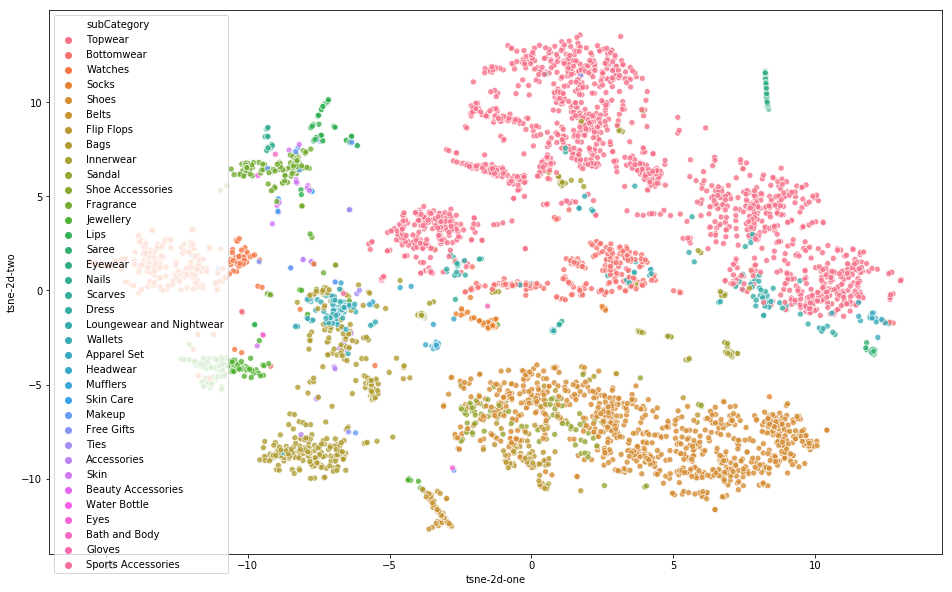

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="subCategory",
                data=df,
                legend="full",
                alpha=0.8)

## Conclusion

Convolutional networks can be used to generate generic embeddings of any content. These embeddings can be used to identify similar items and in a recommendation process.

A big improvement would be to retrain some network layers in a dataset similar to the one that will be used. So the network learns better features for a specific problem.

In [37]:
df.sample(10).to_csv('df_sample.csv')
df_embs.to_csv('embeddings.csv')
df.to_csv('metadados.csv')